In [1]:
from pathlib import Path
import pandas as pd

# Define current work directory
current_dir = Path.cwd()

In [3]:
#Access input folder
input_dir1 = Path ("G:/Chamodi/LSDYNA3D/RP_TH_models/RP_section_datasets_reduced")
#print ("INPUT 1",input_dir1)

#Access folders inside input folder
input_dir2 =  [folder1 for folder1 in input_dir1.iterdir() if folder1.is_dir()]
#print ("INPUT 2",input_dir2)

In [2]:
#Access input folder
input_dir1a = Path ("H:/Chamodi/LSDYNA/Reflected_pressure/RP_near_field_datasets_reduced")
#print ("INPUT 1",input_dir1)

#Access folders inside input folder
input_dir2a =  [folder1a for folder1a in input_dir1a.iterdir() if folder1a.is_dir()]
#print ("INPUT 2",input_dir2)

## Open RP_all_all excel file

In [3]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Standoff distance", "Max pressure", "Min pressure", "Number of datapoints"])

In [5]:
results = []

for folder1a in input_dir2a: # folder1-1.00m
    
    SD = float(folder1a.name[:-1])

    input_dir3a =  [folder2a for folder2a in folder1a.iterdir() if folder2a.is_dir()]
    
    max_pressure = float('-inf')
    min_pressure = float('inf')
    total_datapoints = 0
    
    for folder2a in input_dir3a: # folder2-05m00.5kg
        
        # Make a list of data file names
        files1a = [file1a for file1a in folder2a.rglob("*") if file1a.suffix == '.xlsx' and file1a.suffix != '.png']
            
        # Access each file 
        for file1a in files1a: # file-1.xlsx
                
            # Read data from Excel file
            df1 = pd.read_excel(file1a)
            
            pressure_values = df1['Pressure'].dropna().values
            
            # Update the max and min pressure values
            max_pressure = max(max_pressure, pressure_values.max())
            min_pressure = min(min_pressure, pressure_values.min())
            
            # Update the total number of data points
            total_datapoints += len(pressure_values)
                    
    # Collect the results for this folder1
    results.append({
        "Standoff distance": SD,
        "Max pressure": max_pressure,
        "Min pressure": min_pressure,
        "Number of datapoints": total_datapoints
    })
    
'''for folder1 in input_dir2: # folder1-RP_curves_fr5m
    
    SD = int(folder1.name[-3:-1])

    input_dir3 =  [folder2 for folder2 in folder1.iterdir() if folder2.is_dir()]
    
    max_pressure = float('-inf')
    min_pressure = float('inf')
    total_datapoints = 0
    
    for folder2 in input_dir3: # folder2-05m00.5kg
        
        # Make a list of data file names
        files1 = [file1 for file1 in folder2.rglob("*") if file1.suffix == '.xlsx' and file1.suffix != '.png']
            
        # Access each file 
        for file1 in files1: # file-1.xlsx
                
            # Read data from Excel file
            df1 = pd.read_excel(file1)
            
            pressure_values = df1['Pressure'].dropna().values
            
            # Update the max and min pressure values
            max_pressure = max(max_pressure, pressure_values.max())
            min_pressure = min(min_pressure, pressure_values.min())
            
            # Update the total number of data points
            total_datapoints += len(pressure_values)
                    
    # Collect the results for this folder1
    results.append({
        "Standoff distance": SD,
        "Max pressure": max_pressure,
        "Min pressure": min_pressure,
        "Number of datapoints": total_datapoints
    })'''
  
# Create a DataFrame with the collected results
results_df = pd.DataFrame(results)

In [6]:
print (results_df)

   Standoff distance  Max pressure  Min pressure  Number of datapoints
0               1.00     63852.210     -84.95757                  7848
1               1.25     35369.540     -85.94411                  8294
2               1.50     25898.830     -86.91861                  7513
3               1.75     19384.280     -87.23938                  7806
4               2.00     15393.880     -87.20335                  8069
5               2.25     12303.590     -87.93718                  8053
6               2.50      9721.967     -87.48460                  7989
7               2.75      7691.713     -83.71290                  7875
8               3.00      6092.748     -83.82842                  8254


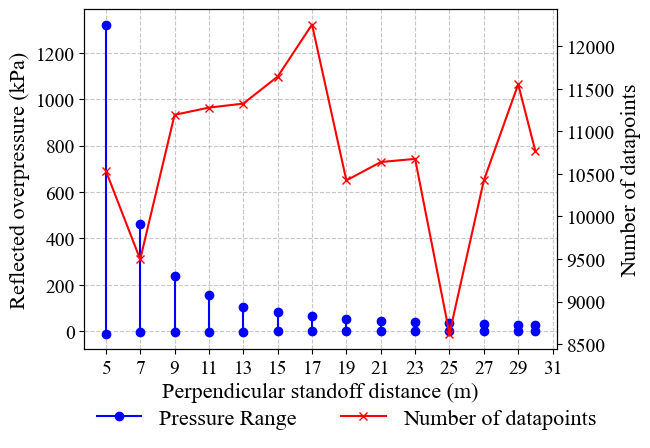

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Filter the DataFrame to include only rows with Standoff distance >= 3
filtered_df = results_df[results_df['Standoff distance'] >= 5]

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 16

fig, ax1 = plt.subplots(figsize=(7, 5))

# Plot max and min pressure values with standoff distance
for _, row in filtered_df .iterrows():
    ax1.plot([row['Standoff distance'], row['Standoff distance']],
             [row['Min pressure'], row['Max pressure']],
             color='blue', marker='o', label='Pressure Range' if _ == filtered_df .index[0] else "")

# Label the primary y-axis (for pressure values)
ax1.set_xlabel('Perpendicular standoff distance (m)')
ax1.set_ylabel('Reflected overpressure (kPa)')
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xticks([5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31])
#ax1.set_xlim(2.8,31)

# Create a secondary y-axis for the number of data points
ax2 = ax1.twinx()
ax2.plot(filtered_df ['Standoff distance'], filtered_df ['Number of datapoints'],
         color='red', marker='x', label='Number of datapoints')
ax2.set_ylabel('Number of datapoints')
ax2.tick_params(axis='y', labelsize=14)
ax2.set_xticks([5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31])
#ax1.set_xlim(2.8,31)

# Add grid lines
ax1.grid(True, linestyle='--', alpha=0.7)

# Combine legend handles and labels from both axes
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles += handles2
labels += labels2

# Add legend outside the plot with two columns
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2, fontsize=16, frameon=False)

# Title and layout adjustments
# plt.title('Pressure Range and Number of Datapoints vs. Standoff Distance')
fig.subplots_adjust(bottom=0.2, right = 0.8)

# Save the plot as an image
plt.savefig('RP_farfield_dataset_info.png', dpi=200, facecolor='white')


# Show the plot
#plt.show()

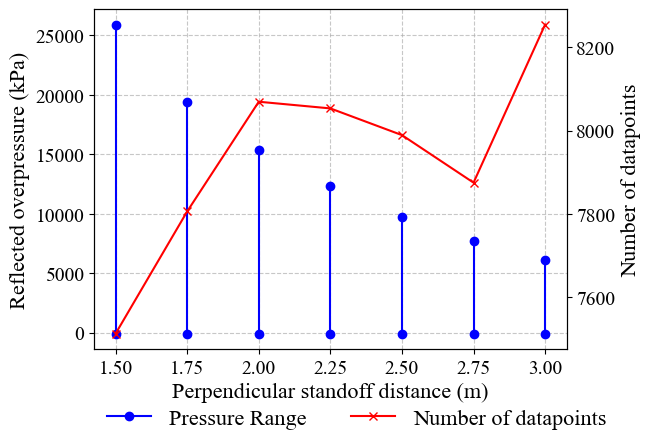

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Filter the DataFrame to include only rows with Standoff distance >= 3
filtered_df2 = results_df[results_df['Standoff distance'] >= 1.5]

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 16

fig, ax1 = plt.subplots(figsize=(7, 5))

# Plot max and min pressure values with standoff distance
for _, row in filtered_df2.iterrows():
    ax1.plot([row['Standoff distance'], row['Standoff distance']],
             [row['Min pressure'], row['Max pressure']],
             color='blue', marker='o', label='Pressure Range' if _ == filtered_df2.index[0] else "")

# Label the primary y-axis (for pressure values)
ax1.set_xlabel('Perpendicular standoff distance (m)')
ax1.set_ylabel('Reflected overpressure (kPa)')
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xticks([1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])


# Create a secondary y-axis for the number of data points
ax2 = ax1.twinx()
ax2.plot(filtered_df2['Standoff distance'], filtered_df2['Number of datapoints'],
         color='red', marker='x', label='Number of datapoints')
ax2.set_ylabel('Number of datapoints')
ax2.tick_params(axis='y', labelsize=14)
ax2.set_xticks([1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])


# Add grid lines
ax1.grid(True, linestyle='--', alpha=0.7)

# Combine legend handles and labels from both axes
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles += handles2
labels += labels2

# Add legend outside the plot with two columns
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2, fontsize=16, frameon=False)

# Title and layout adjustments
# plt.title('Pressure Range and Number of Datapoints vs. Standoff Distance')
fig.subplots_adjust(bottom=0.2, right = 0.8)

# Save the plot as an image
plt.savefig('RP_nearfield_dataset_info2.png', dpi=200, facecolor='white')


# Show the plot
#plt.show()